This notebook tries to recreate the style of the iconic travel sequence from "Raiders of the Lost Ark" using Python. If you're not remembering it well, here it is: https://www.youtube.com/watch?v=5TY5Fp6O5iM

If you have never seen the movie, what are you doing with your life? Please take care of that ASAP.

We'll be using Matplotlib and Basemap to create the maps, and the wonderful MoviePy to handle the animation and take care of editing/composing the final video.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
from mpl_toolkits.basemap import Basemap

from moviepy.editor import *
from moviepy.video.io.bindings import mplfig_to_npimage
import bisect

In [2]:
times = [-0.01, 5.5, 10, 20, 23, 26, 32]
lats = [38.7139, 24.9500, 13.7500, 18.7953, 13.3622, 21.0333, 9.5000]
lons = [-9.1394, 55.3333, 100.4667, 98.9986, 103.8597, 105.8500, 100.0000]

cam_lat_offset = [0, -2, 1, 0, 0, 1, -2]
cam_lon_offset = [0, 2, 3, 2, 3, 4, 2]

### Basic Mapping

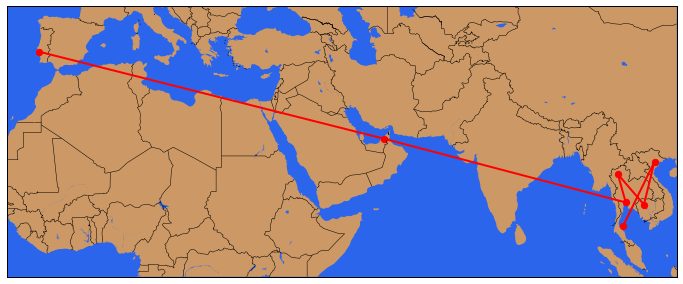

In [3]:
fig0, ax = plt.subplots(1,figsize=(12,8), facecolor='white')

m = Basemap(llcrnrlon=-15,llcrnrlat=0,urcrnrlon=110,urcrnrlat=45,
            resolution='l',projection='merc')

m.drawmapboundary(fill_color='#2B65EC')
m.drawcountries()
m.fillcontinents(color='#cc9966',lake_color='#2B65EC', zorder=0)

x, y = m(lons, lats)
m.plot(x, y, '-', linewidth=2, color='r')
m.scatter(x, y, s=40, marker='o',color='r')

plt.show()

### Animating the line

In [4]:
fig1, ax = plt.subplots(1,figsize=(12,8), facecolor='white')

m = Basemap(llcrnrlon=-15,llcrnrlat=0,urcrnrlon=110,urcrnrlat=45,
            resolution='l',projection='merc')

m.drawmapboundary(fill_color='#2B65EC')
m.drawcountries()
m.fillcontinents(color='#cc9966',lake_color='#2B65EC', zorder=0)

def make_frame_mpl(t):
    origin_ind = bisect.bisect_left(times, t)-1
    x, y = m([lons[origin_ind], np.interp(t, times, lons)],
             [lats[origin_ind], np.interp(t, times, lats)])
    m.plot(x, y, '-', linewidth=2, color='r')
    return mplfig_to_npimage(fig1)

animation = VideoClip(make_frame_mpl, duration=times[-1]+1)

animation.to_videofile('output/1-animating_line.mp4', fps=25);

[MoviePy] >>>> Building video output/1-animating_line.mp4
[MoviePy] Writing video output/1-animating_line.mp4


100%|███████████████████████████████████████████████████████████████████████████████▉| 825/826 [00:49<00:00, 16.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/1-animating_line.mp4 



Output:

[![1-animating_line](https://img.youtube.com/vi/brQqFk22HtU/0.jpg)](https://youtu.be/brQqFk22HtU)


### Animating the Camera

In [5]:
fig2 = plt.figure(1,figsize=(12.8,7.2), facecolor='white')
ax = fig2.add_subplot(111)

m = Basemap(llcrnrlon=-15,llcrnrlat=0,urcrnrlon=180,urcrnrlat=45,
            resolution='i',projection='merc')

m.drawmapboundary(fill_color='#2B65EC')
m.drawcountries()
m.fillcontinents(color='#cc9966',lake_color='#2B65EC', zorder=0)

def make_frame_mpl_improved(t):
    line_ind = bisect.bisect_left(times, t)
    line_lons = lons[:line_ind]
    line_lats = lats[:line_ind]
    
    end_lon = np.interp(t, times, lons)
    end_lat = np.interp(t, times, lats)
    
    line_lons.append(end_lon)
    line_lats.append(end_lat)
    
    x, y = m(line_lons, line_lats)
    
    m.plot(x, y, '-', linewidth=4, color='r')
    if line_ind-1==(len(times)-1):
        x, y = m(lons[-1], lats[-1])
        m.scatter(x, y, s=40, marker='o',color='r')

    #camera
    c_lon = np.interp(t, times, cam_lon_offset)+end_lon
    c_lat = np.interp(t, times, cam_lat_offset)+end_lat

    c_x, c_y = m(c_lon, c_lat)
  
    ax.set_xlim(c_x-711111, c_x+711111)
    ax.set_ylim(c_y-400000, c_y+400000)
        
    return mplfig_to_npimage(fig2)

animation2 = VideoClip(make_frame_mpl_improved, duration=times[-1]+4)

animation2.to_videofile('output/2_animating_camera.mp4', fps=25);

[MoviePy] >>>> Building video output/2_animating_camera.mp4
[MoviePy] Writing video output/2_animating_camera.mp4


100%|███████████████████████████████████████████████████████████████████████████████▉| 900/901 [03:26<00:00,  3.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/2_animating_camera.mp4 



Outupt:

[![2-animating_camera](https://img.youtube.com/vi/H8Znnge3t80/0.jpg)](https://youtu.be/H8Znnge3t80)


### Composing the final video

In [6]:
#background videos
clips = [VideoFileClip("videos/"+"1 - dubai.mp4"),
         VideoFileClip("videos/2 - bangkok.mp4"),
         VideoFileClip("videos/3 - train.mp4"),
         VideoFileClip("videos/4 - angkor.mp4"),
         VideoFileClip("videos/5 - hanoi.mp4").subclip(4,10),
         VideoFileClip("videos/6 - ha long.mp4").subclip(13.5,20),
         VideoFileClip("videos/7 - koh samui.mp4")
        ]

In [21]:
plt.close()

fig3 = plt.figure(1,figsize=(12.8,7.2), facecolor='white')
ax3 = fig3.add_subplot(111)

m3 = Basemap(llcrnrlon=-15,llcrnrlat=0,urcrnrlon=180,urcrnrlat=45,
            resolution='i',projection='merc')

m3.drawmapboundary(fill_color='#2B65EC')
m3.drawcountries()
m3.fillcontinents(color='#cc9966',lake_color='#2B65EC', zorder=0)

def make_frame_mpl_improved(t):
    #lines
    line_ind = bisect.bisect_left(times, t)
    line_lons = lons[:line_ind]
    line_lats = lats[:line_ind]

    end_lon = np.interp(t, times, lons)
    end_lat = np.interp(t, times, lats)
    
    line_lons.append(end_lon)
    line_lats.append(end_lat)
    
    x, y = m3(line_lons, line_lats)
    
    m3.plot(x, y, '-', linewidth=4, color='r', ax=ax3)
    if line_ind-1==(len(times)-1):
        x, y = m3(lons[-1], lats[-1])
        m3.scatter(x, y, s=40, marker='o',color='r')

    #camera
    c_lon = np.interp(t, times, cam_lon_offset)+end_lon
    c_lat = np.interp(t, times, cam_lat_offset)+end_lat

    c_x, c_y = m3(c_lon, c_lat)
  
    ax3.set_xlim(c_x-711111, c_x+711111)
    ax3.set_ylim(c_y-400000, c_y+400000)
        
    return mplfig_to_npimage(fig3)


#creating the map animation
animation3 = VideoClip(make_frame_mpl_improved, duration=times[-1]+4
                      ).crop(y1=50*2, y2=-52*2, x1=64*2, x2=-50*2)

#creating the travel video
travel_video = CompositeVideoClip([clip.set_start(time) for clip, time in zip(clips, times)]
                                 ).without_audio()

#putting the two together
video = CompositeVideoClip([animation3.set_start(0),
                            travel_video.set_start(0).set_end(35).resize(width=795).set_opacity(0.5)])

video.to_videofile('output/3-putting_it_all_together.mp4', fps=25)

[MoviePy] >>>> Building video output/3-putting_it_all_together.mp4
[MoviePy] Writing video output/3-putting_it_all_together.mp4


100%|███████████████████████████████████████████████████████████████████████████████▉| 900/901 [04:14<00:00,  5.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/3-putting_it_all_together.mp4 



Outupt:

[![2-animating_camera](https://img.youtube.com/vi/1nhG-bJO6KQ/0.jpg)](https://youtu.be/1nhG-bJO6KQ)